In [1]:
import sys
sys.path.append('/content/drive/MyDrive/colab')
PACKAGE_PATH = '/content/drive/MyDrive/colab/packages'
if PACKAGE_PATH not in sys.path:
    sys.path.append(PACKAGE_PATH)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,classification_report

In [4]:
file_path='/content/drive/MyDrive/colab/'
df=pd.read_csv(file_path+'data/desi_stars.csv',index_col=0)

In [5]:
print(df.shape)
df.head()

(4750477, 30)


,z,zerr,chi2,subtype,morphtype,ebv,flux_g,flux_r,flux_z,flux_w1,...,fibertotflux_r,fibertotflux_z,gaia_phot_g_mean_mag,gaia_phot_bp_mean_mag,gaia_phot_rp_mean_mag,coeff_0,coeff_1,coeff_2,coeff_3,coeff_4
39628473198711006,-0.000069,8.066745e-07,57903.546964,G,PSF,0.053758,356.878500,511.257870,560.903600,139.894710,...,396.22455,434.700000,15.794322,16.096014,15.331054,34912.510978,-58.864964,-743.786740,210.315274,351.286367
1152921504619435527,-0.000038,4.481989e-06,14892.817330,M,NaN,0.051629,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,20.403383,0.000000,0.000000,-681.641795,128.841187,-23.949334,0.716820,-8.988677
1152921504619435582,0.000098,4.753192e-06,11548.243202,M,NaN,0.051625,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,20.332270,0.000000,0.000000,-606.101167,202.211603,-57.944038,-32.678510,11.755964
39628473207097483,-0.000155,1.370832e-06,30294.328937,G,PSF,0.050515,103.943115,149.515100,163.248120,40.065598,...,116.34612,127.032560,17.141590,17.468811,16.666250,8779.740015,370.223826,269.693260,-36.649175,245.453272
39628473211289672,-0.000032,1.148578e-05,9428.524438,M,PSF,0.048970,0.109821,0.411892,6.435524,8.218025,...,0.32026,5.003843,0.000000,0.000000,0.000000,-151.752792,13.060089,0.691751,-0.346474,0.366482


In [6]:
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)

Index(['subtype', 'morphtype'], dtype='object')


In [7]:
df['subtype'].value_counts()

,count
subtype,
K,2274717
G,1542632
M,508679
F,345419
WD,50880
A,25320
B,2468
CV,362


In [8]:
print(df['morphtype'].isna().sum()/len(df))
df['morphtype'].value_counts()

0.05045935387120072


,count
morphtype,
PSF,3139886
GPSF,1300467
SER,23827
GGAL,16834
REX,12145
EXP,9427
DEV,8177
DUP,8


In [9]:
df['subtype']=df['subtype'].astype('category')
df['morphtype']=df['morphtype'].fillna('unknown').astype('category')

In [10]:
df_sample = df.sample(n=100000, random_state=42)
X = df_sample.drop(columns=['subtype'])
y = df_sample['subtype']
X["morphtype"] = LabelEncoder().fit_transform(X["morphtype"].astype(str))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
model = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      0.72      0.82       115
           B       1.00      0.22      0.36         9
          CV       0.00      0.00      0.00         1
           F       0.97      0.91      0.94      1453
           G       0.98      0.99      0.98      6496
           K       0.99      1.00      0.99      9566
           M       1.00      1.00      1.00      2149
          WD       0.97      0.99      0.98       211

    accuracy                           0.99     20000
   macro avg       0.86      0.73      0.76     20000
weighted avg       0.99      0.99      0.99     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


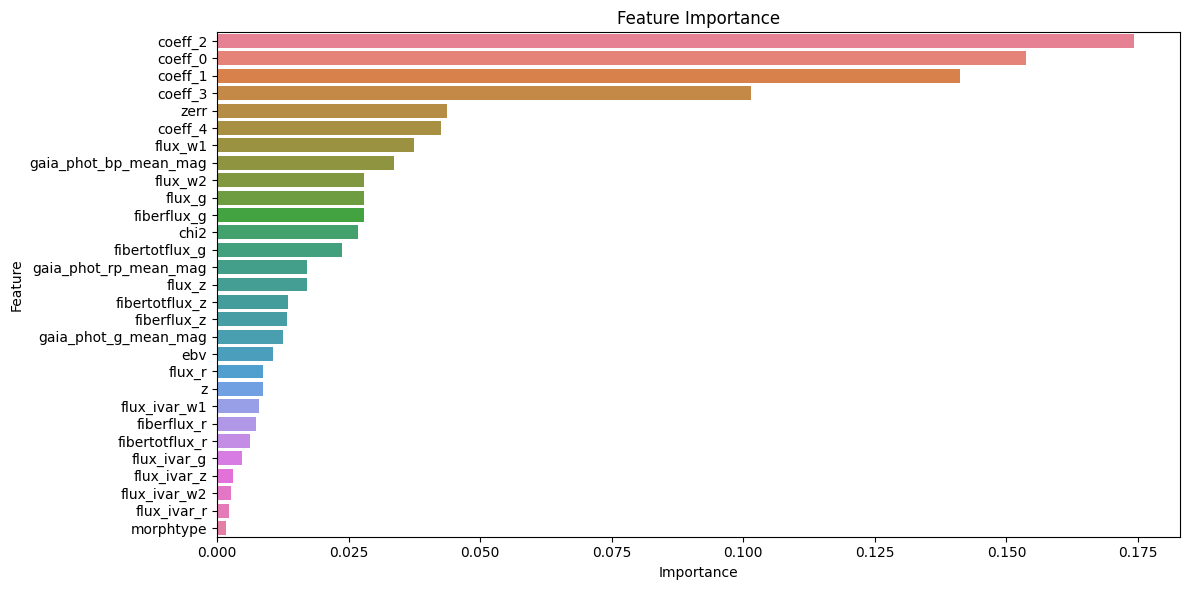

In [14]:
importances = model.feature_importances_
feature_names = X_train.columns
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_df, y='feature', x='importance', orient='h',hue='feature',legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [11]:
X = df.drop(columns=['subtype'])
y = df['subtype']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
train_set = lgb.Dataset(X_train, label=y_train)
test_set = lgb.Dataset(X_test, label=y_test, reference=train_set)

model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=y.nunique(),
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=100,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    reg_lambda=1.0,
    n_jobs=-1,
    random_state=42,
    verbosity=-1,
    n_estimators=1000
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[
      lgb.early_stopping(50),
      lgb.log_evaluation(50)
    ],
)
model.booster_.save_model(file_path+'star_best_model.txt')

Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.0573043
[100]	valid_0's multi_logloss: 0.0281526
[150]	valid_0's multi_logloss: 0.018448
[200]	valid_0's multi_logloss: 0.0141502
[250]	valid_0's multi_logloss: 0.0116749
[300]	valid_0's multi_logloss: 0.0101285
[350]	valid_0's multi_logloss: 0.0090686
[400]	valid_0's multi_logloss: 0.00831024
[450]	valid_0's multi_logloss: 0.00776883
[500]	valid_0's multi_logloss: 0.00733205
[550]	valid_0's multi_logloss: 0.00699583
[600]	valid_0's multi_logloss: 0.00670323
[650]	valid_0's multi_logloss: 0.00649099
[700]	valid_0's multi_logloss: 0.00629259
[750]	valid_0's multi_logloss: 0.00614641
[800]	valid_0's multi_logloss: 0.00603681
[850]	valid_0's multi_logloss: 0.0059324
[900]	valid_0's multi_logloss: 0.00584037
[950]	valid_0's multi_logloss: 0.00576943
[1000]	valid_0's multi_logloss: 0.00569129
Did not meet early stopping. Best iteration is:
[997]	valid_0's multi_logloss: 0.00569087


LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
               min_child_samples=100, n_estimators=1000, n_jobs=-1, num_class=8,
               objective='multiclass', random_state=42, reg_lambda=1.0,
               verbosity=-1)

In [19]:
booster = lgb.Booster(model_file=(file_path+'star_best_model.txt'))

In [16]:
y_pred_prob = booster.predict(X_test, num_iteration=booster.best_iteration)
y_pred = y_pred_prob.argmax(axis=1)
target_names = y_test.cat.categories
y_test_int = y_test.cat.codes
print(classification_report(y_test_int, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.97      0.96      0.97      5064
           B       0.95      0.84      0.89       494
          CV       1.00      1.00      1.00        72
           F       0.99      0.99      0.99     69084
           G       1.00      1.00      1.00    308526
           K       1.00      1.00      1.00    454944
           M       1.00      1.00      1.00    101736
          WD       1.00      1.00      1.00     10176

    accuracy                           1.00    950096
   macro avg       0.99      0.97      0.98    950096
weighted avg       1.00      1.00      1.00    950096



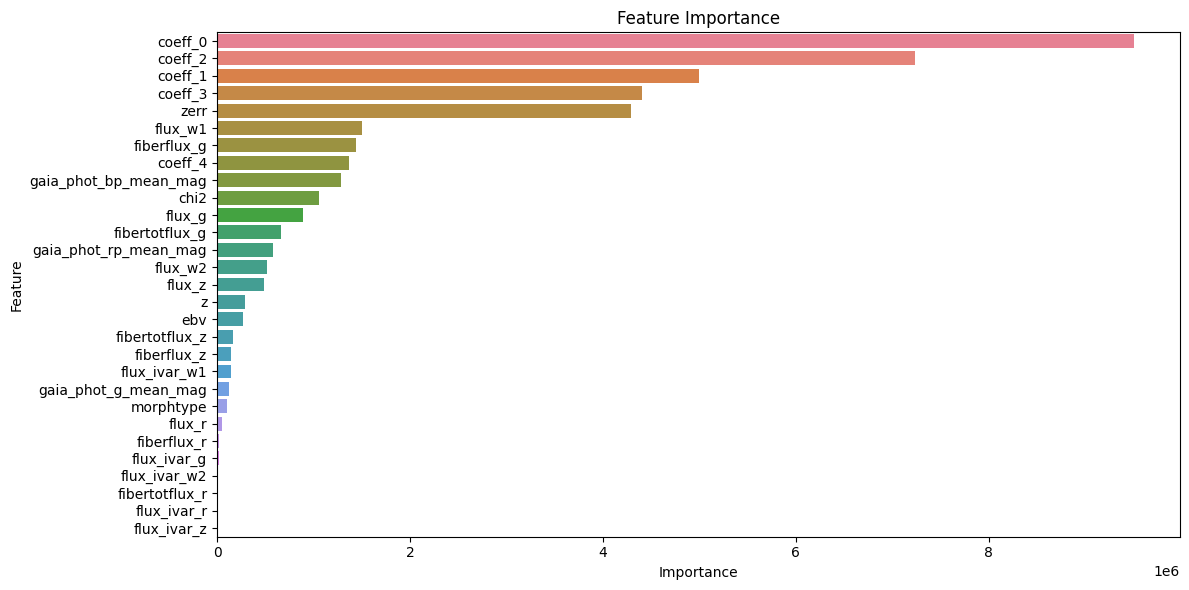

In [20]:
lgbm_importances = booster.feature_importance(importance_type='gain')

feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': lgbm_importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_df, y='feature', x='importance', orient='h',hue='feature',legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [22]:
print(feature_df)

                  feature    importance
24                coeff_0  9.506805e+06
26                coeff_2  7.238448e+06
25                coeff_1  4.991509e+06
27                coeff_3  4.406222e+06
1                    zerr  4.294061e+06
8                 flux_w1  1.498480e+06
15            fiberflux_g  1.436665e+06
28                coeff_4  1.363435e+06
22  gaia_phot_bp_mean_mag  1.289189e+06
2                    chi2  1.059374e+06
5                  flux_g  8.958163e+05
18         fibertotflux_g  6.601689e+05
23  gaia_phot_rp_mean_mag  5.827979e+05
9                 flux_w2  5.212241e+05
7                  flux_z  4.898066e+05
0                       z  2.851784e+05
4                     ebv  2.724067e+05
20         fibertotflux_z  1.691008e+05
17            fiberflux_z  1.478303e+05
13           flux_ivar_w1  1.434859e+05
21   gaia_phot_g_mean_mag  1.205157e+05
3               morphtype  1.030510e+05
6                  flux_r  5.562517e+04
16            fiberflux_r  2.055753e+04
